# Results

In [14]:
import json
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

## 1. Baseline

Results of the baseline model:

In [87]:
with open('../results/baseline/noseed/results_1.json') as f:
    results = json.load(f)
df = pd.DataFrame({
    'precision': np.round(results['prec'] + [results['avg_prec']], 3),
    'recall': np.round(results['rec'] + [results['avg_rec']], 3),
    'f1': np.round(results['f1'] + [results['avg_f1']], 3)
}, index=(results['labels'] + ['average']))
print('accuracy:', np.round(results['acc'], 3))
df

accuracy: 0.776


,f1,precision,recall
negative,0.769,0.784,0.755
positive,0.782,0.769,0.796
average,0.776,0.776,0.776


## 2. Controlling randomness

In [42]:
acc = []
for path in os.listdir('../results/baseline/noseed'):
    with open(os.path.join('../results/baseline/noseed', path)) as f:
        results = json.load(f)
        acc.append(results['acc'])

seed_acc = []
for path in os.listdir('../results/baseline/seed'):
    with open(os.path.join('../results/baseline/seed', path)) as f:
        results = json.load(f)
        seed_acc.append(results['acc'])

df = pd.DataFrame({
    'min': np.round([np.amin(acc), np.amin(seed_acc)], 3),
    'max': np.round([np.amax(acc), np.amax(seed_acc)], 3),
    'mean': np.round([np.mean(acc), np.mean(seed_acc)], 3),
    'std': np.round([np.std(acc), np.std(seed_acc)], 3)
}, columns=['min', 'max', 'mean', 'std'], index=['no seed', 'seed (123)'])

df

,min,max,mean,std
no seed,0.776,0.804,0.790,0.009
seed (123),0.792,0.798,0.795,0.002


## 3. Sensitivity Analisys

### 3.1 Window sizes

In [49]:
accs = []
names = []
for path in sorted(os.listdir('../results/baseline/windows'), key=lambda x: os.path.splitext(x)[0]):
    with open(os.path.join('../results/baseline/windows', path)) as f:
        results = json.load(f)
        accs.append(results['acc'])
        names.append(os.path.splitext(path)[0])
pd.DataFrame({'accuracy': accs}, index=names)

,accuracy
1,0.778182
1-3-5-7,0.730909
14-15-16,0.670303
2-3-4,0.743030
2-3-4-5,0.727273
3,0.739394
3-4-5,0.722424
4-5-6,0.710303
5,0.718788
6-7-8-9,0.692121


### 3.2 Filters

,filter_size,accuracy
0,50,0.781818
1,100,0.795152
2,200,0.789091
3,300,0.797576
4,500,0.792727
5,1000,0.787879


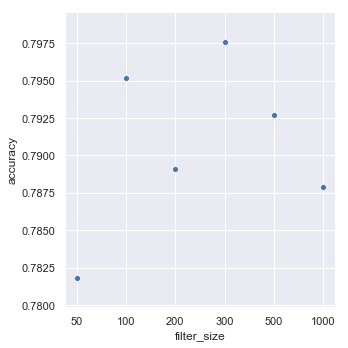

In [64]:
accs = []
names = []
for path in sorted(os.listdir('../results/baseline/filters'), key=lambda x: int(os.path.splitext(x)[0])):
    with open(os.path.join('../results/baseline/filters', path)) as f:
        results = json.load(f)
        accs.append(results['acc'])
        names.append(os.path.splitext(path)[0])

df = pd.DataFrame({'accuracy': accs, 'filter_size': names}, columns=['filter_size', 'accuracy'])
sns.relplot(x='filter_size', y='accuracy', data=df)
df

### 3.3 POS-tagged

In [86]:
with open('../results/baseline/pos/1.zip.json') as f:
    results = json.load(f)
df = pd.DataFrame({
    'precision': np.round(results['prec'] + [results['avg_prec']], 3),
    'recall': np.round(results['rec'] + [results['avg_rec']], 3),
    'f1': np.round(results['f1'] + [results['avg_f1']], 3)
}, index=(results['labels'] + ['average']))
print('accuracy:', np.round(results['acc'], 3))
df

accuracy: 0.673


,f1,precision,recall
negative,0.651,0.689,0.618
positive,0.692,0.660,0.727
average,0.671,0.674,0.672


## 4. Influence of word embeddings

### 4.1 Word Embeddings

In [78]:
static = []
for path in sorted(os.listdir('../results/baseline/embedding')):
    with open(os.path.join('../results/baseline/embedding', path)) as f:
        results = json.load(f)
        static.append(results['acc'])

non_static = []
for path in sorted(os.listdir('../results/baseline/fine_tuning')):
    with open(os.path.join('../results/baseline/fine_tuning', path)) as f:
        results = json.load(f)
        non_static.append(results['acc'])

multichannel = []
for path in sorted(os.listdir('../results/baseline/multichannel')):
    with open(os.path.join('../results/baseline/multichannel', path)) as f:
        results = json.load(f)
        multichannel.append(results['acc'])

pd.DataFrame({
    'static': np.round(static,3),
    'non-static': np.round(non_static,3),
    'multichannel': np.round(multichannel,3)
}, columns=['static', 'non-static', 'multichannel'], index=[
    'wiki+Gigaword (w2v)',
    'wiki+Gigaword (glove)',
    'GoogleNews (w2v)',
    'CommonCrawl 840B (glove)',
    'wiki-news (fasttext)'
])

,static,non-static,multichannel
wiki+Gigaword (w2v),0.680,0.704,0.702
wiki+Gigaword (glove),0.764,0.773,0.750
GoogleNews (w2v),0.795,0.798,0.793
CommonCrawl 840B (glove),0.821,0.818,0.815
wiki-news (fasttext),0.818,0.817,0.810


### 4.2 Infering OOVs

In [83]:
with open('../results/baseline/infer-oov/fasttext-infer-oov.json') as f:
    results = json.load(f)
df = pd.DataFrame({
    'precision': np.round(results['prec'] + [results['avg_prec']], 3),
    'recall': np.round(results['rec'] + [results['avg_rec']], 3),
    'f1': np.round(results['f1'] + [results['avg_f1']], 3)
}, index=(results['labels'] + ['average']))
print('accuracy:', np.round(results['acc'], 3))
df

accuracy: 0.808


,f1,precision,recall
negative,0.799,0.831,0.770
positive,0.817,0.790,0.847
average,0.808,0.810,0.808
